In [1]:
import math
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon
from common import Fonts, Images, NWSL, Colors, add_twitter_handle

In [2]:
season = 2023

In [3]:
df = pd.read_csv("data/" + str(season) + "_schedule.csv")
df["date"] = pd.to_datetime(df["date"])
df

,date,home,away,is_challenge_cup,is_playoff,home_goals,away_goals,home_penalty,away_penalty,won_on_penalties
0,2023-03-25,NC,KC,False,False,1,0,0,0,False
1,2023-03-25,SD,CHI,False,False,3,2,0,0,False
2,2023-03-26,WAS,RGN,False,False,1,0,0,0,False
3,2023-03-26,POR,ORL,False,False,4,0,0,0,False
4,2023-03-26,HOU,LOU,False,False,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...
163,2023-10-15,ORL,HOU,False,False,0,0,0,0,False
164,2023-10-15,LA,POR,False,False,0,0,0,0,False
165,2023-10-15,WAS,NC,False,False,0,0,0,0,False
166,2023-10-15,NJY,KC,False,False,0,0,0,0,False


In [6]:
# Offsets to get the location of the square
square = {
    0: [0, 0.5],
    1: [0.5, 0.5],
    2: [0.5, 0],
    3: [0, 0],
}
# Offsets to get the location of the triangle
triangle = {
    0: ([[0, 0], [0, 0.5], [0.5, 0.5]], [[0.5, 0.5], [0.5, 1], [1, 1]]),
    1: ([[0, 1], [0.5, 1], [0.5, 0.5]], [[0.5, 0.5], [1, 0], [1, 0.5]]),
    2: ([[0, 0], [0.5, 0], [0.5, 0.5]], [[0.5, 0.5], [1, 1], [1, 0.5]]),
    3: ([[0, 0.5], [0, 1], [0.5, 0.5]], [[0.5, 0], [0.5, 0.5], [1, 0]]),
}

# Index: square_colors[is_challenge_cup][is_playoff]
square_colors = [
    # [regular, playoff]
    ["darkgray", "whitesmoke"], # Regular season
    ["lightgray", "whitesmoke"], # Challenge cup
]

def color(team):
    if team == "KC":
        return "#cf3339"
    elif team == "NJY":
        return "#a9f1f5"
    else:
        return NWSL.color(team)

# Draw individual match
def draw_match(ax, match, row, col):
    if match["date"] >= date(2023,7,3):
        return
    home = color(match["home"])
    away = color(match["away"])
    s = square_colors[match["is_challenge_cup"]][match["is_playoff"]]
    t0 = s
    t1 = home
    t2 = away
    if match["home_goals"] > match["away_goals"]:
        t0 = home
        t1 = away
        t2 = away
    elif match["home_goals"] < match["away_goals"]:
        t0 = away
        t1 = home
        t2 = home
    
    
    orient = (col % 2) + ((row ) % 2) * 2
    # Draw background square (big triangle)
    ax.add_patch(Rectangle((0, 0), 1, 1, color=t0))
    # Draw first triangle
    ax.add_patch(Polygon(triangle[orient][0], color=t1))
    # Draw second triangle
    ax.add_patch(Polygon(triangle[orient][1], color=t2))
    # Draw small square
    ax.add_patch(Rectangle(square[orient], 0.5, 0.5, color=s))

<ipython-input-6-3cddc5509e71>:33: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if match["date"] >= date(2023,7,3):


<Figure size 432x288 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

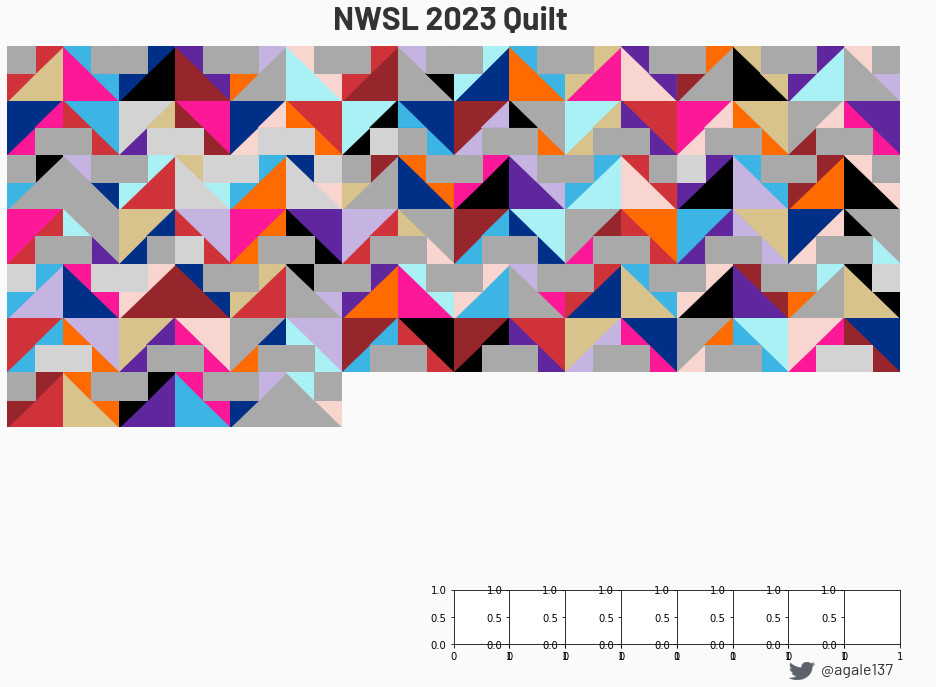

In [7]:
# Draw the plot
plt.clf()
plt.figure(dpi=200)
cols = 16
rows = 11
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(cols, rows))
fig.patch.set_facecolor(Colors.WHITE)
plt.subplots_adjust(wspace=0, hspace=0)

for i, match in df.iterrows():
    col = i % cols
    row = math.floor(i / cols)
    ax = axs[row, col]
    #ax.set_facecolor(Colors.WHITE)
    ax.axis("off")
    draw_match(ax, match, row, col)

# Title
fig.suptitle(
    "NWSL " + str(season) + " Quilt",
    x=0.51,
    y=0.93,
    fontproperties=Fonts.BARLOW_BOLD,
    size=32,
    ha="center",
    color=Colors.BLACK,
)

# Twitter logo and username
add_twitter_handle(fig, x=0.8, y=0.08, fs=16, w=0.025)

# Save image
plt.savefig(str(season) + "_season_quilt.png", bbox_inches="tight", pad_inches=0.5)